## Gender Based Violence - Tweet classification challenge 

This challenge aims to classify tweets about GBV without using keywords.

Are you able to develop a machine learning model that can classify a tweet about gender-based violence into either of the five categories:
- Sexual violence
- Emotional violence
- Economic violence
- Physical violence
- Harmful traditional practice


### Install modules/package

In [1]:
# !pip install -U nltk #natural language toolkit

### import libraries/modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

### load the dataset

In [3]:
train = pd.read_csv("Train.csv")

In [4]:
train.head()

Tweet_ID                                              tweet  \
0  ID_0022DWKP  Had a dream i got raped last night. By a guy i...   
1  ID_00395QYM  he thought the word raped means sex and told m...   
2  ID_003EOSSF  She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...   
3  ID_004BBHOD  I was sexually abused for 3 years at age 4 to ...   
4  ID_004F7516  Chessy Prout can do better by telling the trut...   

              type  
0  sexual_violence  
1  sexual_violence  
2  sexual_violence  
3  sexual_violence  
4  sexual_violence

In [5]:
#print('\033[1m' + 'Text' + '\033[0m')
print("------------" + "\033[1m" + "Train Info" + "\033[0m" + "-------------")
train.info()

------------Train Info-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39650 entries, 0 to 39649
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet_ID  39650 non-null  object
 1   tweet     39650 non-null  object
 2   type      39650 non-null  object
dtypes: object(3)
memory usage: 929.4+ KB


In [6]:
train.type.value_counts()

sexual_violence                 32648
Physical_violence                5946
emotional_violence                651
economic_violence                 217
Harmful_Traditional_practice      188
Name: type, dtype: int64

In [7]:
test = pd.read_csv("Test.csv")

In [8]:
test.head()

Tweet_ID                                              tweet
0  ID_0095QL4S  because he was my boyfriend, and if I said no,...
1  ID_00DREW5O  lol no, I'm telling you it's not legal. It's l...
2  ID_00E9F5X9  Somalia's semi-autonomous Puntland region has ...
3  ID_00G9OSKZ  University of Cape Coast students being robbed...
4  ID_00HU96U6  "Somebody came up behind him and stabbed him i...

In [9]:
print("--------------" + "\033[1m" + "Test Info" + "\033[0m" + "--------------")
test.info()

--------------Test Info--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15581 entries, 0 to 15580
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet_ID  15581 non-null  object
 1   tweet     15581 non-null  object
dtypes: object(2)
memory usage: 243.6+ KB


### EDA

In [10]:
train.shape # the training dataset has 39650 rows

(39650, 3)

In [11]:
train["type"].unique()

array(['sexual_violence', 'Physical_violence', 'emotional_violence',
       'Harmful_Traditional_practice', 'economic_violence'], dtype=object)

<AxesSubplot:xlabel='type', ylabel='count'>

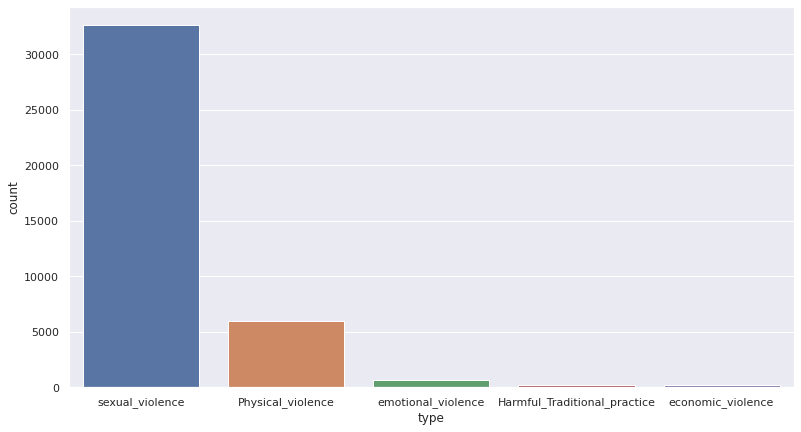

In [12]:
sns.set(rc={'figure.figsize':(13,7)})
sns.set_theme(style="darkgrid")
sns.countplot(x="type", data=train)

This dataset is highly imbalanced; from the graphs above, sexual violence is about 80%+. 

In [13]:
test.shape # the test dataset has 15581 rows

(15581, 2)

### Create models

Before we develop our models, we can set aside some validation dataset for inference purposes. We'll use scikit learn train test split module.https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [14]:
X = train.drop(["type"], axis=1)
y = train["type"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

CountVectorizer -converts text files/data into numerical feature vectors. You can find more information on CountVectorizer  here  https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [16]:
X_train.tweet.values[1000]

'What about the lives of Palestinians? What about the lives of children who were raped while he was head of the CPS and did nothing to prosecute the Rapist. Sorry but Starmer would be arrested for High Treason if it was up to me.'

In [17]:
vectorizer = CountVectorizer()

# fit_transform our tweets values to numerical vectors
x_train_counts = vectorizer.fit_transform(X_train["tweet"])
x_train_counts

# documents = X_train["tweet"].tolist() 
# bag_of_words = CountVectorizer()
# bag_of_words.fit(documents)
# word_counts = bag_of_words.transform(documents)

<26565x30352 sparse matrix of type '<class 'numpy.int64'>'
	with 824624 stored elements in Compressed Sparse Row format>

In [18]:
print(vectorizer.get_feature_names())

['00', '000', '00006', '000th', '0093', '00am', '01', '010413', '01am', '02', '026', '03', '04', '05', '06', '07780', '08', '08146229938', '09', '09091177639', '0this', '10', '100', '1000', '10000', '1000000', '1000000000', '1000s', '1000th', '1000x', '100cedis', '100k', '100l', '100m', '100millions', '100s', '100thieves', '100x', '101', '1012', '102', '10221582408610984', '103', '103730280384th', '104', '105', '108', '10am', '10f', '10k', '10million', '10mins', '10mo', '10month', '10pm', '10s', '10th', '10times', '10x', '10year', '10years', '10yo', '10yrs', '11', '110', '1100', '110k', '111', '1130pm', '1152', '11f', '11i', '11k', '11pm', '11th', '11year', '11yo', '11yr', '11yrs', '12', '120', '1200', '1207', '120lbs', '12137', '122', '123', '1236', '1240', '1247', '125', '1260', '127', '1271', '1274', '1275936441', '1276', '1285', '1293', '1296', '1299', '12a', '12hrs', '12mth', '12pm', '12th', '12y', '12year', '12yo', '12yr', '12yrs', '13', '130', '130k', '1311', '1312', '132', '13f

Using the CountVectorizer is effective, but this might give more preference to longer tweets than others. Let's try using frequencies. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

In [19]:
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
x_train_tfidf.shape

/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(26565, 30352)

In [20]:
# Analysing the most highly rated words
top_idf_indicies = tfidf_transformer.idf_.argsort()[:-20:-1]
idx_to_word = vectorizer.get_feature_names()

for ind in top_idf_indicies:
    print(f"{tfidf_transformer.idf_[ind]}:{idx_to_word[ind]}")

10.494240301132503:𝚙𝚘𝚟
10.494240301132503:intriguing
10.494240301132503:interpret
10.494240301132503:interrogator
10.494240301132503:interrogators
10.494240301132503:intersecting
10.494240301132503:interstate
10.494240301132503:intertwine
10.494240301132503:intervenes
10.494240301132503:intervening
10.494240301132503:interviewer
10.494240301132503:intestines
10.494240301132503:inthe
10.494240301132503:intimidates
10.494240301132503:intk
10.494240301132503:intolerable
10.494240301132503:intolerance
10.494240301132503:intolerant
10.494240301132503:intox


A word like __"rape"__ has not been flagged yet it is very important in the classification

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
# Encoding target class
le = LabelEncoder()
le.fit(y)
ye_le = le.transform(y)

In [23]:
X_train, X_test, y_tr_enc, y_te_enc = train_test_split(X, ye_le, test_size=0.33, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

Multiple algorithms are used for text classification; let’s look at:-

### 1. Naive Bayes MultinomialNB https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [25]:
# train.type.values our y values using MultinomialNB
naive1 = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                  ('clf', MultinomialNB())])
naive1 = naive1.fit(X_train["tweet"], y_tr_enc)

In [26]:
# train.type.values our y values using random forest classifier
rfc1 = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('clf', RandomForestClassifier())])
rfc1 = rfc1.fit(X_train["tweet"], y_tr_enc)

In [27]:
# # train.type.values our y values using XGBClassifier
# xgbc1 = Pipeline([('vect', CountVectorizer()),
#                   ('tfidf', TfidfTransformer()),
#                   ('clf', XGBClassifier(use_label_encoder=False))])
# xgbc1 = xgbc1.fit(X_train["tweet"], y_tr_enc)

### evaluation metric
The evaluation metric on the Zindi leaderboard is accuracy; let’s test our simple model,

In [28]:
# Prediction with Naive Bayes
naive_predicted1 = naive1.predict(X_test.tweet)
# Prediction with random forestclassifier
rfc_predicted1 = rfc1.predict(X_test.tweet)
# Prediction with XGBClassifier
# xgbc_predicted1 = xgbc1.predict(X_test.tweet)

/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(


In [29]:
print("\033[1m" + "MultinomialNB" + "\033[0m" + " predicted classes: ", np.unique(naive_predicted1))
print("\033[1m" + "RandomForestClassifier" + "\033[0m" + " predicted classes: ", np.unique(rfc_predicted1))
# print("\033[1m" + "XGBClassifier" + "\033[0m" + " predicted classes: ", np.unique(xgbc_predicted1))

MultinomialNB predicted classes:  [1 3 4]
RandomForestClassifier predicted classes:  [0 1 2 3 4]


In [30]:
from sklearn.metrics import accuracy_score
print("MultinomialNB Accuracy: ", accuracy_score(y_te_enc, naive_predicted1))
print("RandomForestClassifier Accuracy: ", accuracy_score(y_te_enc, rfc_predicted1))
# print("XGBClassifier Accuracy: ", accuracy_score(y_te_enc, xgbc_predicted1))

MultinomialNB Accuracy:  0.8871226595338173
RandomForestClassifier Accuracy:  0.9937332823844096


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import balanced_accuracy_score

In [32]:
print("----------" + "\033[1m" + "Balanced Accuracy Scoring" + "\033[0m"+"----------")
print("MultinomialNB Accuracy: ", balanced_accuracy_score(y_te_enc, naive_predicted1))
print("RandomForestClassifier Accuracy: ", balanced_accuracy_score(y_te_enc, rfc_predicted1))
# print("XGBClassifier Accuracy: ", balanced_accuracy_score(y_te_enc, xgbc_predicted1))

----------Balanced Accuracy Scoring----------
MultinomialNB Accuracy:  0.29035106978828273
RandomForestClassifier Accuracy:  0.8564003300278772


In [33]:
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

In [34]:
naive1_scores = cross_val_score(naive1, X["tweet"], ye_le, scoring='accuracy', cv=cv, n_jobs=-1)
rcf1_scores = cross_val_score(rfc1, X["tweet"], ye_le, scoring='accuracy', cv=cv, n_jobs=-1)
# xgb1_scores = cross_val_score(xgbc1, X["tweet"], ye_le, scoring='accuracy', cv=cv, n_jobs=-1)

/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/

In [35]:
print("----------" + "\033[1m" + "CV Scoring - Accuracy" + "\033[0m"+"----------")
print("\033[1m" + "MultinomialNB Accuracy: " + "\033[0m", naive1_scores)
print("\033[1m" + "RandomForestClassifier Accuracy: " + "\033[0m", rcf1_scores)
# print("\033[1m" + "XGBClassifier Accuracy: " + "\033[0m", xgb1_scores)

----------CV Scoring - Accuracy----------
MultinomialNB Accuracy:  [0.89369483 0.88839849 0.89003783 0.89205549 0.89079445 0.89230769
 0.89016393 0.89079445 0.89445145 0.89003783 0.88789407 0.89407314
 0.89482976 0.89129887 0.89041614]
RandomForestClassifier Accuracy:  [0.9962169  0.99520807 0.99546028 0.99457755 0.996343   0.99571248
 0.99571248 0.99596469 0.99508197 0.99508197 0.99571248 0.99306431
 0.996343   0.99495586 0.99609079]


In [36]:
naive1_bal_acc = cross_val_score(naive1, X["tweet"], ye_le, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
rcf1_bal_acc = cross_val_score(rfc1, X["tweet"], ye_le, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
# xgb1_bal_acc = cross_val_score(xgbc1, X["tweet"], ye_le, scoring='balanced_accuracy', cv=cv, n_jobs=-1)

/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1208: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  warnings.warn(
/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/

In [37]:
print("----------" + "\033[1m" + "CV Scoring - Balanced Accuracy" + "\033[0m"+"----------")
print("\033[1m" + "MultinomialNB Accuracy: " + "\033[0m", naive1_bal_acc)
print("\033[1m" + "RandomForestClassifier Accuracy: " + "\033[0m", rcf1_bal_acc)
# print("\033[1m" + "XGBClassifier Accuracy: " + "\033[0m", xgb1_bal_acc)

----------CV Scoring - Balanced Accuracy----------
MultinomialNB Accuracy:  [0.29506243 0.2895055  0.29032196 0.29844861 0.2913501  0.29595264
 0.29172284 0.29119363 0.2989011  0.29047842 0.28595458 0.29693731
 0.29520606 0.29606981 0.294921  ]
RandomForestClassifier Accuracy:  [0.85865176 0.8697646  0.91652767 0.85937876 0.89712287 0.87566523
 0.87830908 0.87793132 0.82543365 0.82218523 0.84836687 0.8241968
 0.898127   0.87760216 0.86660718]


In [38]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [39]:
#le.inverse_transform(ye_le)
le.classes_

array(['Harmful_Traditional_practice', 'Physical_violence',
       'economic_violence', 'emotional_violence', 'sexual_violence'],
      dtype=object)

In [40]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({'sexual_violence': 32648, 'Physical_violence': 5946, 'emotional_violence': 651, 'economic_violence': 217, 'Harmful_Traditional_practice': 188})


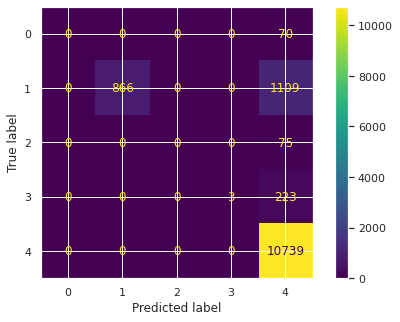

In [41]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_te_enc, naive_predicted1),
    display_labels=rfc1.classes_)

cmp.plot(ax=ax)
plt.show();

In [42]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [43]:
# Weighted average of the f1_score for the random forest model
print("Weighted Average of F1 Score: ", f1_score(y_te_enc, rfc_predicted1, average="weighted"))

Weighted Average of F1 Score:  0.9933253137055481


In [44]:
# Weighted average of the f1_score for the random forest model
print("Weighted Average of F1 Score for Class 0 & 2 - Random Forest: ", f1_score(y_te_enc, rfc_predicted1, average="weighted", labels=[0, 2]))

Weighted Average of F1 Score for Class 0 & 2 - Random Forest:  0.8343328335832084


In [45]:
# Weighted average of the f1_score for the random forest model
print("Weighted Average of F1 Score for Class 0 & 2 - MultinomialNB: ", f1_score(y_te_enc, naive_predicted1, average="weighted", labels=[0, 2]))

Weighted Average of F1 Score for Class 0 & 2 - MultinomialNB:  0.0


In [46]:
print("\033[1m"+"------------Classification Report - MultinomialNB----------"+"\033[0m")
print(classification_report(y_te_enc, naive_predicted1))

------------Classification Report - MultinomialNB----------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       1.00      0.44      0.61      1975
           2       0.00      0.00      0.00        75
           3       1.00      0.01      0.03       226
           4       0.88      1.00      0.94     10739

    accuracy                           0.89     13085
   macro avg       0.58      0.29      0.31     13085
weighted avg       0.89      0.89      0.86     13085



/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
print("\033[1m"+"------------Classification Report - Random Forest----------"+"\033[0m")
print(classification_report(y_te_enc, rfc_predicted1))

------------Classification Report - Random Forest----------
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        70
           1       1.00      1.00      1.00      1975
           2       1.00      0.84      0.91        75
           3       0.99      0.85      0.91       226
           4       0.99      1.00      1.00     10739

    accuracy                           0.99     13085
   macro avg       1.00      0.86      0.91     13085
weighted avg       0.99      0.99      0.99     13085



In [48]:
counter = Counter(y_te_enc)
print(counter)

Counter({4: 10739, 1: 1975, 3: 226, 2: 75, 0: 70})


- Our simple model gave us an accuracy score of 88%, fair enough, but you should also be careful that the data is highly imbalanced, as discussed earlier. 

- Question? Is the imbalance percentage the same as in the test? Can you think of various ways to deal with the imbalance dataset

- We can also see the only 3 categories(i.e 'Physical_violence', 'emotional_violence', 'sexual_violence') were predicted yet we have 5 categories. Therefore 88% might not be that good.


## My Modifications - Model 2
Employing strtified shuffle split

In [49]:
from sklearn.model_selection import StratifiedShuffleSplit

In [50]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=42)

# Performing a Stratified Shuffle Split
for train_index, test_index in split.split(train, train["type"]):
    strat_train_set = train.loc[train_index]
    strat_test_set = train.loc[test_index]

In [51]:
# Comparing the shape outcomes to that of the Random split
print("Stratified train set: ", strat_train_set.shape)
print("Random train set: ", X_train.shape)

Stratified train set:  (26565, 3)
Random train set:  (26565, 2)


In [52]:
# Compiling the randomly split dataset together
y_train_list = y_train.tolist()
rand_train_set = X_train
rand_train_set["type"] = y_train_list

In [53]:
# Analysing the distribution of types of GBV in the random split
print("--------------Random Training Set--------------")
print((rand_train_set.type.value_counts() / len(rand_train_set))*100)

--------------Random Training Set--------------
sexual_violence                 82.473179
Physical_violence               14.948240
emotional_violence               1.599849
economic_violence                0.534538
Harmful_Traditional_practice     0.444193
Name: type, dtype: float64


In [54]:
# Analysing the distribution of types of GBV in the random split
print("--------------Stratified Training Set--------------")
print((strat_train_set.type.value_counts() / len(strat_train_set))*100)

--------------Stratified Training Set--------------
sexual_violence                 82.341427
Physical_violence               14.997177
emotional_violence               1.641257
economic_violence                0.545831
Harmful_Traditional_practice     0.474308
Name: type, dtype: float64


In [55]:
# Percentage representation of each type of abuse in the training set
print("--------------Whole Training Set--------------")
print((train.type.value_counts() / len(train))*100)

--------------Whole Training Set--------------
sexual_violence                 82.340479
Physical_violence               14.996217
emotional_violence               1.641866
economic_violence                0.547289
Harmful_Traditional_practice     0.474149
Name: type, dtype: float64


From the above comparisons, we can see that the stratified training set is much closer to the GBV type representation reflected in the whole dataset

In [56]:
# Let us partition the data into X_train, X_test, y_train, y_test
X_train_strat = strat_train_set.drop(["type"], axis=1)
y_train_strat = strat_train_set["type"]
X_test_strat = strat_test_set.drop(["type"], axis=1)
y_test_strat = strat_test_set["type"]

In [57]:
# train.type.values our y values using MultinomialNB
naive2 = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                  ('clf', MultinomialNB())])
naive2 = naive2.fit(X_train_strat["tweet"], y_train_strat)
# Preidction
naive2_pred = naive2.predict(X_test_strat.tweet)

In [58]:
# Applying random forest classifier estimator on the stratified data
rfc2 = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('clf', RandomForestClassifier())])
rfc2 = rfc2.fit(X_train_strat["tweet"], y_train_strat)
# Preidction
rfc2_pred = rfc2.predict(X_test_strat.tweet)

In [59]:
# Checking how many different types of GBV were predicted
set(rfc2_pred)

{'Harmful_Traditional_practice',
 'Physical_violence',
 'economic_violence',
 'emotional_violence',
 'sexual_violence'}

In [60]:
# Weighted average of the f1_score for the random forest model
print("Weighted Average of F1 Score: ", f1_score(y_test_strat, rfc2_pred, average="weighted"))

Weighted Average of F1 Score:  0.9956485466268847


In [61]:
# Weighted average of the f1_score for the random forest model
print("Weighted Average of F1 Score for Class 0 & 2: ", f1_score(y_test_strat, rfc2_pred, average="weighted",
                                                                 labels=['Harmful_Traditional_practice', 'economic_violence']))

Weighted Average of F1 Score for Class 0 & 2:  0.8447903849925997


In [62]:
m2_m1 = (f1_score(y_test_strat, rfc2_pred, average="weighted", labels=['Harmful_Traditional_practice', 'economic_violence']) - \
f1_score(y_te_enc, rfc_predicted1, average="weighted", labels=[0, 2]))*100
print("Generally, there was a {:.2f}% improvement between Model 1 and Model 2 for the Minority Classes" .format(m2_m1))                                                              

Generally, there was a 1.05% improvement between Model 1 and Model 2 for the Minority Classes


In [63]:
print("\033[1m"+"-------------Classification Report- Model 2 (Random Forest)-----------"+"\033[0m")
print(classification_report(y_test_strat, rfc2_pred))

-------------Classification Report- Model 2 (Random Forest)-----------
                              precision    recall  f1-score   support

Harmful_Traditional_practice       1.00      0.74      0.85        62
           Physical_violence       1.00      1.00      1.00      1962
           economic_violence       1.00      0.72      0.84        72
          emotional_violence       1.00      0.94      0.97       215
             sexual_violence       1.00      1.00      1.00     10774

                    accuracy                           1.00     13085
                   macro avg       1.00      0.88      0.93     13085
                weighted avg       1.00      1.00      1.00     13085



In [64]:
print("\033[1m"+"-----Classification Report - Model 2 (MultinomialNB)------"+"\033[0m")
print(classification_report(y_test_strat, naive2_pred))

-----Classification Report - Model 2 (MultinomialNB)------
                              precision    recall  f1-score   support

Harmful_Traditional_practice       0.00      0.00      0.00        62
           Physical_violence       1.00      0.43      0.60      1962
           economic_violence       0.00      0.00      0.00        72
          emotional_violence       1.00      0.02      0.04       215
             sexual_violence       0.88      1.00      0.94     10774

                    accuracy                           0.89     13085
                   macro avg       0.58      0.29      0.31     13085
                weighted avg       0.89      0.89      0.86     13085



/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## More EDA
First we do feature engineering then use Synthetic Minority Over Sampling

In [65]:
import spacy
from spacy.lang.en import STOP_WORDS, English
nlp = spacy.load("en_core_web_lg")

In [66]:
# Checking for null values in y
print("Null values in y: ", y.isnull().sum())
print("Null values in X: ", X.isnull().sum())

Null values in y:  0
Null values in X:  Tweet_ID    0
tweet       0
dtype: int64


In [67]:
X.head()

Tweet_ID                                              tweet
0  ID_0022DWKP  Had a dream i got raped last night. By a guy i...
1  ID_00395QYM  he thought the word raped means sex and told m...
2  ID_003EOSSF  She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...
3  ID_004BBHOD  I was sexually abused for 3 years at age 4 to ...
4  ID_004F7516  Chessy Prout can do better by telling the trut...

In [68]:
doc = nlp(X.tweet[3])

In [69]:
print("Length of Stop Words: ", len(STOP_WORDS))

Length of Stop Words:  326


In [70]:
lemma_list = [token.lemma_ for token in doc if token.is_stop is False]

In [71]:
print("Old length: ", len(doc))
print("New length: ", len(lemma_list))

Old length:  76
New length:  41


In [72]:
# Cleaning out HTML tags & non-word characters
def txt_preprocessor(text):
    if type(text) == str:
        text = re.sub('<[^>]*>', '', text)
        text = re.sub('[\W]+', '', text.lower())
    return text
# Function to find emoticons in the text
import re
def find_emoticon(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.findall(text)
# Function to lemmantize text and take care of word contractions
def lemma_func(text):
    lemm_tokens = []
    doc = nlp(text)
    for token in doc:
        if token.is_stop is False:
            procsd_token = txt_preprocessor(token.lemma_)
            if procsd_token != "":
                lemm_tokens.append(procsd_token)
    return lemm_tokens

In [74]:
from sklearn.preprocessing import FunctionTransformer

In [75]:
# Functions that converts an ordinary python function into an sklearn compatible one  
def pipelinize(function, active=True):
    def list_comprehend_a_function(list_or_series, active=True):
        if active:
            return [function(i) for i in list_or_series]
        else: # if it's not active, just pass it right back
            return list_or_series
    return FunctionTransformer(list_comprehend_a_function, validate=False, kw_args={'active':active})

In [76]:
# Creating a pipeline for the above functions
spacy_estimators = [('lemmatizer', pipelinize(lemma_func)), ('preprocessor', pipelinize(txt_preprocessor))]
spacy_pipe = Pipeline(spacy_estimators)

result = spacy_pipe.transform([X.tweet[3]])[0]

In [77]:
# print(result)

In [78]:
from textblob import TextBlob
# Creating a copy of X to avoid dst
X1 = X.copy()

In [79]:
# Processing the tweets in each row using the newly created spacy_pipe
X1.insert(2, 'processed_tweet', X1['tweet'].map(lambda text: spacy_pipe.transform([text])[0]))

In [80]:
# Word count of processed tweet 
X1.insert(3, 'word_count', X1['processed_tweet'].map(lambda text: len(text)))
# Sentiment analysis of tweets
X1.insert(4, 'polarity', X1['tweet'].map(lambda text: TextBlob(text).sentiment.polarity))

In [81]:
print('5 random tweets with the highest positive sentiment polarity: \n')
cl = X1.loc[X1.polarity == 1, ['tweet']].sample(5).values
for c in cl:
    print(c[0])

5 random tweets with the highest positive sentiment polarity: 

then threw me on the floor and by my hair pulled me dragged me and threw me on the bed and raped me.  This is a man who calls himself an angel and jesus christ and he says that IT IS MY Fault he did that, and says that he is perfect.
but to the man who told me I deserved to get raped after I had repeatedly told him no and he still touched me in inappropriate places. I was 16 he was 25. He was supposed to be my best friend. (And this is just one story I have)
JESUS CHRIST BETRAYED ME ALONG WITH MY HUSBAND, OPENING MY PRAYERS FOR MY HUSBAND'S PROTECTION MORE THAN ONCE. AND THAT IT WAS STOLEN FROM ME FOREVER, FOREVER!!!!!!!!!!!!!!!!!!!!!.and he RAPED me AT my wedding with HIS power!!!!!!!!!!!!!!!!.  
OMg I have the best work husband!! I broke my and he sent me these $200  
My just waxed my chin for me, that is a good man!! Beats going to the shop


In [82]:
print('5 random tweets with the highest negative sentiment polarity: \n')
cl = X1.loc[X1.polarity == -1, ['tweet']].sample(5).values
for c in cl:
    print(c[0])

5 random tweets with the highest negative sentiment polarity: 

I’m not blaming it on God. But why isn’t he keeping his promises??  God is everywhere.  Let me ask you. As a mother would u watch evil happen to ur Child?? Would u watch ur Child get raped,killed??
You are very stupid, where does it read in the thread that I mentioned he raped me
No, the worst they can say is "help... police... he raped me!  "
This man, Matthew Impirin drugged and raped me the summer of 2018, after G Eazy’s concert, he introduced me to G Eazy, in their hotel room w my friend. He used to make me trust him. I’ll never forget, and to this day I can’t listen to any G Eazy song w out horrific PTSD.
And looking at all these comments arguing about what he did or didn’t deserve, still everyone ignoring the woman he assaulted. A WOMAN WAS RAPED. Where’s her support fund?? Who’s marching for her?? Where’s “Me Too”??? Again we sideline women’s issues. Disgusting!


In [83]:
print('5 random tweets with neutral sentiment polarity: \n')
cl = X1.loc[X1.polarity == 0, ['tweet']].sample(5).values
for c in cl:
    print(c[0])

5 random tweets with neutral sentiment polarity: 

the fact that he's enabling rapists &amp; blaming victims disgust the hell out of me. his points &amp; metaphors are invalid too. we've heard babies &amp; animals being raped. what should they wear or do to prevent rape? why can't men just lower our gazes or walk away when women say no?
This is NOT an answer to ANY of my questions.  I couldn't care less about Biden, even if he would sniff hair like some claim.(looks like cleverly edited picts to me)  But tramp actually RAPED a girl. Have you seen her testimony yet?
not me reading like three jonah gangbang fics in one day and immediately thinking abt him spending 200+ years refusing to admit to himself that he was raped
My husband strips me naked, beats me – Wife begs court to repay N600 dowry -   News
My husband strips me, beats me severely - wife testifies  


Sentiment polarity is a bit mixed up, rape tweets are ranked as positive and a lot of other as neutral. Let's do some categorial plots to see if there are insights that can be drawn from this.

In [84]:
# Creating a copy of X to avoid dst
train1 = train.copy()

train1.insert(2, 'processed_tweet', train1['tweet'].map(lambda text: spacy_pipe.transform([text])[0]))

train1.insert(3, 'word_count', train1['processed_tweet'].map(lambda text: len(text)))

train1.insert(4, 'polarity', train1['tweet'].map(lambda text: TextBlob(text).sentiment.polarity))

In [85]:
import plotly.offline
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [86]:
train1.type.unique()

array(['sexual_violence', 'Physical_violence', 'emotional_violence',
       'Harmful_Traditional_practice', 'economic_violence'], dtype=object)

In [87]:
px.histogram(train1, x='polarity', color='type')

In [88]:
px.histogram(train1, x='word_count', color='type', title="Word Count")

In [89]:
# Computing the skew for each GBV type
sv_skew = train1.loc[train1.type == 'sexual_violence']['word_count'].skew()
pv_skew = train1.loc[train1.type == 'Physical_violence']['word_count'].skew()
emv_skew = train1.loc[train1.type == 'emotional_violence']['word_count'].skew()
ecv_skew = train1.loc[train1.type == 'economic_violence']['word_count'].skew()
htp_skew = train1.loc[train1.type == 'Harmful_Traditional_practice']['word_count'].skew()

In [90]:
print("Sexual violence skewness: ", sv_skew)
print("Physical violence skewness: ", pv_skew)
print("Emotional violence skewness: ", emv_skew)
print("Economic violence skewness: ", ecv_skew)
print("Harmful traditional practice skewness: ", htp_skew)

Sexual violence skewness:  -0.18097838232001054
Physical violence skewness:  1.1297697430405218
Emotional violence skewness:  -0.06264684393642182
Economic violence skewness:  -0.2654952219488442
Harmful traditional practice skewness:  -0.026968556414857417


#### Analysis of Histogram Word-count distributions
- <b>Sexual Violence</b> has most word counts spread around <b>21</b> words with a fairly symmetric distribution.
- <b>Physical Violence</b> has most word counts spread around <b>7</b> words with a heavy right skew.
- <b>Emotional Violence</b> has most word counts spread around <b>18</b> words with moderate symmetry. 
- <b>Economic violence</b> has most word counts spread around <b>21</b> words with a fairly symmetric distribution.
- <b>Harmful Traditional Practice</b> has most word counts spread around <b>20</b> words with moderate symmetry.

In [91]:
# Function to get top 'n' words including stop words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(train1['tweet'], 20)

for word, freq in common_words:
    print(word, freq)
    
df1 = pd.DataFrame(common_words, columns = ['tweet' , 'count'])
df1.groupby('tweet').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words (Stop Words)')

/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1208: UserWarning:

Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents



me 55094
he 54965
to 38157
and 37866
the 36146
raped 34299
was 25703
my 25347
that 21220
it 18191
of 17032
you 16555
in 16362
is 14129
for 12178
him 10895
his 9715
with 9235
this 9224
but 8985


In [92]:
# Function to get top 'n' words no stop words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words2 = get_top_n_words(train1['tweet'], 20)

for word, freq in common_words2:
    print(word, freq)
    
df1 = pd.DataFrame(common_words2, columns = ['tweet' , 'count'])
df1.groupby('tweet').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 Words (No Stop Words)')

raped 34299
husband 6698
like 6405
beats 5971
just 5804
said 5397
told 4720
amp 4711
rape 4426
man 4309
don 4094
did 4016
know 3846
didn 3761
got 3742
people 3548
women 3443
woman 3231
say 3071
time 2939


### The distribution of top bigrams before removing stop words and after removing stop words

In [93]:
# Function to get top 'n' words including stop words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(train1['tweet'], 20)

for word, freq in common_words:
    print(word, freq)
    
df1 = pd.DataFrame(common_words, columns = ['tweet' , 'count'])
df1.groupby('tweet').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 Bi-grams (Stop Words)')

raped me 10325
he raped 10277
he was 5149
my husband 4840
beats me 4252
me and 3666
was raped 3335
to me 3284
and he 3230
that he 2917
in the 2817
husband beats 2663
me he 2574
me to 2537
raped and 2498
told me 2370
to be 2331
raped by 2141
of the 2110
it was 2088


In [94]:
# Function to get top 'n' words including stop words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(train1['tweet'], 20)

for word, freq in common_words:
    print(word, freq)
    
df1 = pd.DataFrame(common_words, columns = ['tweet' , 'count'])
df1.groupby('tweet').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 Bi-grams (No Stop Words)')

husband beats 3108
year old 1382
tells court 904
got raped 857
man raped 808
said raped 592
say raped 569
tw rape 542
don know 516
guy raped 515
getting raped 512
years ago 504
old girl 470
raped amp 460
sexually assaulted 454
sexual assault 448
raped women 424
wife beats 420
raped 13 404
women raped 399


When we remove stop words, we see that a bi-gram like "beats me" gets removed as well this could be troublesome for our model. Although sexual violence remains overwhelmingly dominant with just a few appearences of physical violence.

#### Analysis of tri-grams models with and without Stop Words

In [95]:
# Function to get top 'n' words including stop words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(train1['tweet'], 20)

for word, freq in common_words:
    print(word, freq)
    
df1 = pd.DataFrame(common_words, columns = ['tweet' , 'count'])
df1.groupby('tweet').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 Tri-grams (Stop Words)')

he raped me 5074
my husband beats 2441
husband beats me 2324
raped me and 1179
he raped her 1013
who raped me 883
was raped by 792
that he raped 761
and raped me 676
he told me 617
to be raped 582
raped me he 507
told me he 501
me when was 458
the fact that 452
he beats me 437
raped me when 418
was raped and 418
raped me in 408
the man who 401


In [96]:
# Function to get top 'n' words including stop words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(train1['tweet'], 20)

for word, freq in common_words:
    print(word, freq)
    
df1 = pd.DataFrame(common_words, columns = ['tweet' , 'count'])
df1.groupby('tweet').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 Tri-grams (No Stop Words)')

year old girl 370
13 year old 348
woman tells court 316
wife tells court 301
husband tells court 238
raped 13 year 234
14 year old 161
wife beats husband 152
husband beats sex 114
beats boxing competition 113
15 year old 112
raped sexually assaulted 111
raped multiple times 110
husband beats boxing 105
beats husband tells 96
boxing competition woman 95
female genital mutilation 93
competition woman tells 91
sex woman tells 85
raped 14 year 84


With tri-grams, when we remove Stop Words, our results are less overwhelmed by the Sexual violence category. We can see that even the category on Harmful Traditional Practices is also included.

### Part-of-speech tags
Let's look at part of speech tags, we shall use spacy and TextBlob to see which gives us the best results

In [97]:
doc = nlp(train1.tweet[3])

In [98]:
speech_tags = []
for token in doc:
    speech_tags.append(token.pos_)

In [99]:
from collections import Counter
counter = Counter(speech_tags)
print(counter)

Counter({'PRON': 12, 'PUNCT': 11, 'NOUN': 10, 'VERB': 9, 'ADP': 8, 'NUM': 6, 'AUX': 5, 'DET': 4, 'ADV': 3, 'SPACE': 3, 'PART': 2, 'ADJ': 2, 'PROPN': 1})


In [100]:
counter.most_common(3)[1][0]

'PUNCT'

In [101]:
# Function to extract Part-of-Speech tags
def speech_tags(text):
    doc = nlp(text)
    speech_tags = []
    for token in doc:
        speech_tags.append(token.pos_)
    return speech_tags

In [102]:
train1.insert(4, 'speech_tags', train1['tweet'].map(speech_tags))

In [103]:
# train2 = train1.copy()
# train1.insert(5, 'speechtags_dict', train1.speech_tags.map(Counter))

# train1.drop("speechtags_dict", axis=1, inplace=True)

In [104]:
train1.head()

Tweet_ID                                              tweet  \
0  ID_0022DWKP  Had a dream i got raped last night. By a guy i...   
1  ID_00395QYM  he thought the word raped means sex and told m...   
2  ID_003EOSSF  She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...   
3  ID_004BBHOD  I was sexually abused for 3 years at age 4 to ...   
4  ID_004F7516  Chessy Prout can do better by telling the trut...   

                                     processed_tweet  word_count  \
0  [dream, got, rape, night, guy, work, actually,...          15   
1  [think, word, rape, mean, sex, tell, see, dog,...          12   
2  [talk, rape, 2, men, 1, molest, jail, nother, ...          11   
3  [sexually, abuse, 3, year, age, 4, 7, believe,...          27   
4  [chessy, prout, well, tell, truth, sell, owen,...          24   

                                         speech_tags  polarity  \
0  [VERB, DET, NOUN, PRON, AUX, VERB, ADJ, NOUN, ...  0.175000   
1  [PRON, VERB, DET, NOUN, VERB, VERB, NOUN, CCON... -0.500000   
2  [PRON, PART, VERB, ADP, PRON, PRON, AUX, VERB,... -0.100000   
3  [PRON, AUX, ADV, VERB, ADP, NUM, NOUN, ADP, NO... -0.097222   
4  [PROPN, PROPN, AUX, VERB, ADV, ADP, VERB, DET,...  0.166667   

              type  
0  sexual_violence  
1  sexual_violence  
2  sexual_violence  
3  sexual_violence  
4  sexual_violence

In [105]:
def most_common_label(label):
    from collections import Counter
    counter = Counter(label)
    return counter.most_common(1)[0][0]

In [106]:
most_common_label(train1.speech_tags[0])

'VERB'

In [107]:
train1.insert(5, 'most_common_pos', train1['speech_tags'].map(most_common_label))
#train1["most_common_pos"] = train1["most_common_pos"].map(lambda x: x[0][0])

In [108]:
train1.head()

Tweet_ID                                              tweet  \
0  ID_0022DWKP  Had a dream i got raped last night. By a guy i...   
1  ID_00395QYM  he thought the word raped means sex and told m...   
2  ID_003EOSSF  She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...   
3  ID_004BBHOD  I was sexually abused for 3 years at age 4 to ...   
4  ID_004F7516  Chessy Prout can do better by telling the trut...   

                                     processed_tweet  word_count  \
0  [dream, got, rape, night, guy, work, actually,...          15   
1  [think, word, rape, mean, sex, tell, see, dog,...          12   
2  [talk, rape, 2, men, 1, molest, jail, nother, ...          11   
3  [sexually, abuse, 3, year, age, 4, 7, believe,...          27   
4  [chessy, prout, well, tell, truth, sell, owen,...          24   

                                         speech_tags most_common_pos  \
0  [VERB, DET, NOUN, PRON, AUX, VERB, ADJ, NOUN, ...            VERB   
1  [PRON, VERB, DET, NOUN, VERB, VERB, NOUN, CCON...            VERB   
2  [PRON, PART, VERB, ADP, PRON, PRON, AUX, VERB,...           PROPN   
3  [PRON, AUX, ADV, VERB, ADP, NUM, NOUN, ADP, NO...            PRON   
4  [PROPN, PROPN, AUX, VERB, ADV, ADP, VERB, DET,...            VERB   

   polarity             type  
0  0.175000  sexual_violence  
1 -0.500000  sexual_violence  
2 -0.100000  sexual_violence  
3 -0.097222  sexual_violence  
4  0.166667  sexual_violence

In [109]:
train1.loc[train1["type"] == "Harmful_Traditional_practice"]\
["most_common_pos"].value_counts()\
.iplot(kind='bar', yTitle='Count', linecolor='black', title='Part of Speech Tags - Harmful Traditional Practice')

In [110]:
train1.loc[train1["type"] == "economic_violence"]["most_common_pos"].value_counts()\
.iplot(kind='bar', yTitle='Count', linecolor='black', title='Part of Speech Tags - Economic Violence')

In [111]:
train1.loc[train1["type"] == "emotional_violence"]["most_common_pos"].value_counts()\
.iplot(kind='bar', yTitle='Count', linecolor='black', title='Part of Speech Tags - Emotional Violence')

In [112]:
train1.loc[train1["type"] == "Physical_violence"]["most_common_pos"].value_counts()\
.iplot(kind='bar', yTitle='Count', linecolor='black', title='Part of Speech Tags - Physical Violence')

In [113]:
train1.loc[train1["type"] == "sexual_violence"]["most_common_pos"].value_counts()\
.iplot(kind='bar', yTitle='Count', linecolor='black', title='Part of Speech Tags - Sexual Violence')

Analysis of entities in the tweets

In [114]:
# Function to extract entity labels in the different tweets
def is_entity(tweet):
    doc = nlp(tweet)
    ents = []
    for ent in doc.ents:
        ents.append(ent.label_)
    return ents    

In [115]:
# Creating a new column for entity labels
train1.insert(6, 'entities', train1['tweet'].map(is_entity))

In [116]:
def most_common_ent(label):
    from collections import Counter
    counter = Counter(label)
    if len(counter.most_common(1)) >= 1:
        return counter.most_common(1)[0][0]
    else:
        return 0
# Counting the number of entities in each tweet
# train1.insert(8, 'commonest_entity', train1['entities'].map(most_common_ent))
train1["commonest_entity"] = train1['entities'].map(most_common_ent)

In [117]:
train1.head(3)

Tweet_ID                                              tweet  \
0  ID_0022DWKP  Had a dream i got raped last night. By a guy i...   
1  ID_00395QYM  he thought the word raped means sex and told m...   
2  ID_003EOSSF  She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...   

                                     processed_tweet  word_count  \
0  [dream, got, rape, night, guy, work, actually,...          15   
1  [think, word, rape, mean, sex, tell, see, dog,...          12   
2  [talk, rape, 2, men, 1, molest, jail, nother, ...          11   

                                         speech_tags most_common_pos  \
0  [VERB, DET, NOUN, PRON, AUX, VERB, ADJ, NOUN, ...            VERB   
1  [PRON, VERB, DET, NOUN, VERB, VERB, NOUN, CCON...            VERB   
2  [PRON, PART, VERB, ADP, PRON, PRON, AUX, VERB,...           PROPN   

               entities  polarity             type commonest_entity  
0                [TIME]     0.175  sexual_violence             TIME  
1                    []    -0.500  sexual_violence                0  
2  [CARDINAL, CARDINAL]    -0.100  sexual_violence         CARDINAL

In [118]:
train1.insert(7, 'num_ents', train1['entities'].map(lambda x: len(x)))

In [119]:
px.histogram(train1, x ='num_ents', color='type', title="NUMBER OF ENTITIES")

In [120]:
train1.loc[train1["type"] == "sexual_violence"]["commonest_entity"].value_counts()\
.iplot(kind='bar', yTitle='Count', linecolor='black', title='COMMONEST ENTITIES - SEXUAL VIOLENCE')

In [121]:
train1.loc[train1["type"] == "Physical_violence"]["commonest_entity"].value_counts()\
.iplot(kind='bar', yTitle='Count', linecolor='black', title='COMMONEST ENTITIES - PHYSICAL VIOLENCE')

In [122]:
train1.loc[train1["type"] == "emotional_violence"]["commonest_entity"].value_counts()\
.iplot(kind='bar', yTitle='Count', linecolor='black', title='COMMONEST ENTITIES - EMOTIONAL VIOLENCE')

In [123]:
train1.loc[train1["type"] == "economic_violence"]["commonest_entity"].value_counts()\
.iplot(kind='bar', yTitle='Count', linecolor='black', title='COMMONEST ENTITIES - ECONOMIC VIOLENCE')

In [124]:
train1.loc[train1["type"] == "Harmful_Traditional_practice"]\
["commonest_entity"].value_counts()\
.iplot(kind='bar', yTitle='Count', linecolor='black', title='COMMONEST ENTITIES - HARMFUL TRADITIONAL PRACTICE')

In majority of the tweets, no entity was mentioned, however, for those where an entity was mentioned, <b>PERSON</b> was the commonest in Sexual violence, Physical violence, and Emotional violence. We see that this trend changes when we go to Economic violence where <b>DATE</b> is most mentioned and in <b>HARMFUL TRADITIONAL PRACTICE</b> where <b>ORG</b>, <b>NORP</b>, and <b>GPE</b> are top 3. Should I create individual columns for these entity labels and count how many times in each tweet the entity appeared.
The entities aspect makes the minority class "Harmful Traditional Practice" class seen.

 ### Box plot of sentiment polarity per department

In [125]:
from plotly import graph_objects as go

In [126]:
# Defining the y - values
y0 = train1.loc[train1['type'] == 'sexual_violence']['polarity']
y1 = train1.loc[train1['type'] == 'Physical_violence']['polarity']
y2 = train1.loc[train1['type'] == 'emotional_violence']['polarity']
y3 = train1.loc[train1['type'] == 'economic_violence']['polarity']
y4 = train1.loc[train1['type'] == 'Harmful_Traditional_practice']['polarity']

trace0 = go.Box(
    y=y0,
    name = 'Sexual Violence',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)

trace1 = go.Box(
    y=y1,
    name = 'Physical Violence',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Emotional Violence',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Economic Violence',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Harmful Traditional Practice',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)

data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title = "SENTIMENT POLARITY ANALYSIS BY GBV TYPE"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "SENTIMENT POLARITY BY GBV TYPE")

In [127]:
# Defining the y - values
y0 = train1.loc[train1['type'] == 'sexual_violence']['num_ents']
y1 = train1.loc[train1['type'] == 'Physical_violence']['num_ents']
y2 = train1.loc[train1['type'] == 'emotional_violence']['num_ents']
y3 = train1.loc[train1['type'] == 'economic_violence']['num_ents']
y4 = train1.loc[train1['type'] == 'Harmful_Traditional_practice']['num_ents']

trace0 = go.Box(
    y=y0,
    name = 'Sexual Violence',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)

trace1 = go.Box(
    y=y1,
    name = 'Physical Violence',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Emotional Violence',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Economic Violence',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Harmful Traditional Practice',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)

data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title = "NUMBER OF ENTITIES ANALYSIS BY GBV TYPE"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "NUMBER OF ENTITIES ANALYSIS BY GBV TYPE")

The box-plots analysis conforms to our previous findings from the column charts, Harmful Traaditional Practice has a higher median of the number of entities than the others, similarly to the other two minority classes and so this a strong feature for them that can help bring them out in our predictions.

### Tweet length analysis by type of GBV

In [128]:
# Defining the y - values
y0 = train1.loc[train1['type'] == 'sexual_violence']['word_count']
y1 = train1.loc[train1['type'] == 'Physical_violence']['word_count']
y2 = train1.loc[train1['type'] == 'emotional_violence']['word_count']
y3 = train1.loc[train1['type'] == 'economic_violence']['word_count']
y4 = train1.loc[train1['type'] == 'Harmful_Traditional_practice']['word_count']

trace0 = go.Box(
    y=y0,
    name = 'Sexual Violence',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)

trace1 = go.Box(
    y=y1,
    name = 'Physical Violence',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Emotional Violence',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Economic Violence',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'Harmful Traditional Practice',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)

data = [trace0, trace1, trace2, trace3, trace4]
layout = go.Layout(
    title = "WORD COUNT ANALYSIS BY GBV TYPE"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "WORD COUNT ANALYSIS BY GBV TYPE")

Similarly in word count, the minority classes are somewhat well represented.

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

## Using Tri-grams in My Model (3)

In [130]:
# train.type.values our y values using MultinomialNB
naive3 = Pipeline([('vect', CountVectorizer(ngram_range=(3, 3), stop_words='english')),
                    ('tfidf', TfidfTransformer(smooth_idf=True,use_idf=True)),
                  ('clf', MultinomialNB())])
naive3 = naive3.fit(X_train_strat["tweet"], y_train_strat)
# Preidction
naive3_pred = naive3.predict(X_test_strat.tweet)

In [131]:
print("\033[1m"+"-------------Classification Report- Model 2 (MultinomialNB)-----------"+"\033[0m")
print(classification_report(y_test_strat, naive2_pred))

-------------Classification Report- Model 2 (MultinomialNB)-----------
                              precision    recall  f1-score   support

Harmful_Traditional_practice       0.00      0.00      0.00        62
           Physical_violence       1.00      0.43      0.60      1962
           economic_violence       0.00      0.00      0.00        72
          emotional_violence       1.00      0.02      0.04       215
             sexual_violence       0.88      1.00      0.94     10774

                    accuracy                           0.89     13085
                   macro avg       0.58      0.29      0.31     13085
                weighted avg       0.89      0.89      0.86     13085



/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [132]:
print("\033[1m"+"-------------Classification Report- Model 3 (MultinomialNB)-----------"+"\033[0m")
print(classification_report(y_test_strat, naive3_pred))

-------------Classification Report- Model 3 (MultinomialNB)-----------
                              precision    recall  f1-score   support

Harmful_Traditional_practice       0.00      0.00      0.00        62
           Physical_violence       1.00      0.43      0.60      1962
           economic_violence       0.00      0.00      0.00        72
          emotional_violence       0.00      0.00      0.00       215
             sexual_violence       0.88      1.00      0.94     10774

                    accuracy                           0.89     13085
                   macro avg       0.38      0.29      0.31     13085
                weighted avg       0.87      0.89      0.86     13085



/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [133]:
# Applying random forest classifier estimator on the stratified data
rfc3 = Pipeline([('vect', CountVectorizer(ngram_range=(1, 2), stop_words='english')),
                 ('tfidf', TfidfTransformer(smooth_idf=True,use_idf=True)),
                 ('clf', RandomForestClassifier())])
rfc3 = rfc3.fit(X_train_strat["tweet"], y_train_strat)
# Preidction
rfc3_pred = rfc3.predict(X_test_strat.tweet)

In [134]:
print("\033[1m"+"-------------Classification Report- Model 2 (Random Forest)-----------"+"\033[0m")
print(classification_report(y_test_strat, rfc2_pred))

-------------Classification Report- Model 2 (Random Forest)-----------
                              precision    recall  f1-score   support

Harmful_Traditional_practice       1.00      0.74      0.85        62
           Physical_violence       1.00      1.00      1.00      1962
           economic_violence       1.00      0.72      0.84        72
          emotional_violence       1.00      0.94      0.97       215
             sexual_violence       1.00      1.00      1.00     10774

                    accuracy                           1.00     13085
                   macro avg       1.00      0.88      0.93     13085
                weighted avg       1.00      1.00      1.00     13085



In [135]:
print("\033[1m"+"-------------Classification Report- Model 3 (Random Forest)-----------"+"\033[0m")
print(classification_report(y_test_strat, rfc3_pred))

-------------Classification Report- Model 3 (Random Forest)-----------
                              precision    recall  f1-score   support

Harmful_Traditional_practice       1.00      0.79      0.88        62
           Physical_violence       1.00      1.00      1.00      1962
           economic_violence       1.00      0.68      0.81        72
          emotional_violence       1.00      0.97      0.98       215
             sexual_violence       1.00      1.00      1.00     10774

                    accuracy                           1.00     13085
                   macro avg       1.00      0.89      0.93     13085
                weighted avg       1.00      1.00      1.00     13085



In [136]:
# Weighted average of the f1_score for the random forest model
print("Weighted Average of F1 Score: ", f1_score(y_test_strat, rfc2_pred, average="weighted"))

Weighted Average of F1 Score:  0.9956485466268847


In [137]:
# Weighted average of the f1_score for the random forest model
print("Weighted Average of F1 Score (Tri-grams): ", f1_score(y_test_strat, rfc3_pred, average="weighted"))

Weighted Average of F1 Score (Tri-grams):  0.9961054764057208


## Some Preprocessing Functions

In [137]:
#conda install -c conda-forge unidecode

In [138]:
def remove_newlines_tabs(text):
    """
    This function will remove all the occurrences of newlines, tabs, and combinations like: \\n, \\.
    """
    # Replacing all the occurrences of \n,\\n,\t,\\ with a space.
    formatted_text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')
    return formatted_text

def strip_html_tags(text):
    """ 
    This function will remove all the occurrences of html tags from the text.
    """
    # Initiating BeautifulSoup object soup.
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(text, "html.parser")
    # Get all the text other than html tags.
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

def remove_links(text):
    """
    This function will remove all the occurrences of links.
    
    """
    import re
    # Removing all the occurrences of links that starts with https
    remove_https = re.sub(r'http\S+', '', text)
    # Remove all the occurrences of text that ends with .com
    remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
    return remove_com

def remove_whitespace(text):
    """ This function will remove extra whitespaces from the text    
    """
    import re
    pattern = re.compile(r'\s+') 
    without_whitespace = re.sub(pattern, ' ', text)
    # There are some instances where there is no space after '?' & ')', 
    # So I am replacing these with one space so that It will not consider two words as one token.
    text = without_whitespace.replace('?', ' ? ').replace(')', ') ')
    return text

# Code for accented characters removal
def accented_characters_removal(text):
    # this is a docstring
    """
    The function will remove accented characters from the 
    text contained within the Dataset.  
    """
    # Remove accented characters from text using unidecode.
    # Unidecode() - It takes unicode data & tries to represent it to ASCII characters. 
    from unidecode import unidecode
    text = unidecode(text)
    return text

# Code for text lowercasing
def lower_casing_text(text):
    """
    The function will convert text into lower case.
    """
    # Convert text to lower case
    # lower() - It converts all upperase letter of given string to lowercase.
    text = text.lower()
    return text

# Code for removing repeated characters and punctuations

def reducing_incorrect_character_repeatation(text):
    """
    This Function will reduce repeatition to two characters 
    for alphabets and to one character for punctuations.
    """
    # Pattern matching for all case alphabets
    pattern_alpha = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL)
    
    # Limiting all the  repeatation to two characters.
    formatted_text = pattern_alpha.sub(r"\1\1", text) 
    
    # Pattern matching for all the punctuations that can occur
    pattern_punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    
    # Limiting punctuations in previously formatted string to only one.
    combined_formatted = pattern_punct.sub(r'\1', formatted_text)
    
    # The below statement is replacing repeatation of spaces that occur more than two times with that of one occurrence.
    final_formatted = re.sub(' {2,}',' ', combined_formatted)
    return final_formatted

# The code for expanding contraction words
def expand_contractions(text):
    """expand shortened words to the actual form e.g. don't to do not
     """
    import contractions
    return contractions.fix(text)


# The code for removing special characters
def removing_special_characters(text):
    import re
    """Removing all the special characters except the one that is passed within 
       the regex to match, as they have important meaning in the text provided. 
   """
    # The formatted text after removing not necessary punctuations.
    formatted_text = re.sub(r"[^a-zA-Z0-9:$-,%.?!\/]+", ' ', text) 
    # In the above regex expression, I provide necessary set of punctuations that could be useful in this particular dataset
    return formatted_text

# Function to lemmantize text and take care of word contractions
def lemma_func(text):
    doc = nlp(text)
    lemm_tokens = [token.lemma_ for token in doc]
    lemm_tokens = ' '.join(lemm_tokens)
    return lemm_tokens

## Applying the above Pre-processing Functions

In [139]:
# Creating a copy of train dataset to avoid modifying it directly
train2 = train.copy()

In [140]:
# Functions that converts an ordinary python function into an sklearn compatible one  
def pipelinize2(function, active=True):
    def list_comprehend_a_function(list_or_series, active=True):
        if active:
            return [function(i) for i in list_or_series]
        else: # if it's not active, just pass it right back
            return list_or_series
    return FunctionTransformer(list_comprehend_a_function, validate=False, kw_args={'active':active})

In [141]:
# Creating a pipeline for the above functions
spacy_estimators2 = [('newline_rem', pipelinize2(remove_newlines_tabs)), ('strip_html', pipelinize2(strip_html_tags)),
                   ('rem_links', pipelinize2(remove_links)), ('rem_accnt', pipelinize2(accented_characters_removal)),
                    ('contractions', pipelinize2(expand_contractions)), #('lemmatizer', pipelinize2(lemma_func)),
                    ("rem_repeatation", pipelinize2(reducing_incorrect_character_repeatation)),
                    ('lower_case', pipelinize2(lower_casing_text)), ('rem_special_xters', pipelinize2(removing_special_characters)),
                    ]#('rem_whitespace', pipelinize2(remove_whitespace))]

spacy_pipe2 = Pipeline(spacy_estimators2)

In [142]:
r1 = spacy_pipe2.transform([train2.tweet[9]])

#result = spacy_pipe.transform([X.tweet[3]])[0] 4 9 10

In [143]:
r1

[' i understand that. my father was abusive as well. he raped my mother and harmed her, one night he killed her right in front of me so i killed him. i even remember when he made his hounds mual me leaving me with scars. i do not regret it. ']

In [144]:
train2.tweet[9]

'"I understand that... My father was abusive as well... He raped my mother and harmed her, one night he killed her right in front of me so I killed him... I even remember when he made his hounds mual me leaving me with scars. I don\'t regret it."'

In [228]:
# Applying random forest classifier estimator on the stratified data
# ('preprocessor', spacy_pipe2),
rfc32 = Pipeline([('vect', CountVectorizer(ngram_range=(1, 1), stop_words='english')),
                  ('tfidf', TfidfTransformer(smooth_idf=True, use_idf=True)),
                  ('clf', RandomForestClassifier())])
rfc32 = rfc32.fit(X_train_strat["tweet"], y_train_strat)
# Preidction
rfc32_pred = rfc32.predict(X_test_strat.tweet)

In [229]:
# Weighted average of the f1_score for the random forest model
print("Weighted Average of F1 Score (uni-bigrams): ", f1_score(y_test_strat, rfc32_pred, average="weighted"))

Weighted Average of F1 Score (uni-bigrams):  0.9989118107231961


In [230]:
rfc32_pred[:30]

array(['sexual_violence', 'sexual_violence', 'sexual_violence',
       'sexual_violence', 'sexual_violence', 'sexual_violence',
       'sexual_violence', 'sexual_violence', 'sexual_violence',
       'sexual_violence', 'sexual_violence', 'sexual_violence',
       'sexual_violence', 'sexual_violence', 'sexual_violence',
       'sexual_violence', 'Physical_violence', 'sexual_violence',
       'sexual_violence', 'sexual_violence', 'sexual_violence',
       'sexual_violence', 'Physical_violence', 'emotional_violence',
       'sexual_violence', 'sexual_violence', 'sexual_violence',
       'Physical_violence', 'Physical_violence', 'sexual_violence'],
      dtype=object)

### Looks like the Tri-grams model has worsened the score.

In [ ]:
# # importing SMOTE for oversampling
# from imblearn.over_sampling import SMOTE
# oversampling = SMOTE(random_state=42)
# # resampling X and y with SMOTE
# X_res, y_res = oversampling.fit_resample(X, y)

### submission

In [179]:
sample_submission = pd.read_csv("SampleSubmission.csv")

In [180]:
sample_submission.head()

Tweet_ID  type
0  ID_0095QL4S   NaN
1  ID_00DREW5O   NaN
2  ID_00E9F5X9   NaN
3  ID_00G9OSKZ   NaN
4  ID_00HU96U6   NaN

In [181]:
#Function to predict and convert into submission format
def make_submission(model_, test_set, samp_sub):
    y_pred = model_.predict(test_set)
    samp_sub["type"] = y_pred
    time_stamp = pd.Timestamp.now(tz='Africa/Kampala').strftime(format='%Y-%m-%d_%H-%M_')
    samp_sub.to_csv(f'./Submissions/{time_stamp}submission.csv', index=False)
    return samp_sub

In [189]:
submission = make_submission(rfc1, test.tweet, sample_submission)

/mnt/d/NLP/envs/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:1208: UserWarning:

Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents



In [190]:
submission.head()

Tweet_ID  type
0  ID_0095QL4S     4
1  ID_00DREW5O     4
2  ID_00E9F5X9     4
3  ID_00G9OSKZ     4
4  ID_00HU96U6     4

In [188]:
submission["type"].unique()

array(['sexual_violence', 'Harmful_Traditional_practice',
       'economic_violence', 'Physical_violence', 'emotional_violence'],
      dtype=object)

In [ ]:
##let's prdict on the test data
test_predict = clf.predict(test.tweet)
test_predict

In [ ]:
np.unique(test_predict)

In [ ]:
sample_submission["type"] = test_predict

sample_submission.to_csv('baseline_sub.csv', index=False)

### To do,
- Do more analysis
- Try working on ways to balance the dataset, undersampling, oversampling, using SMOTE, etc
- You can try other text classification models, e.g., using nltk, etc.
